In [754]:
import numpy as no
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [755]:
#Esta linea peemite que los graficos sean renderizados directamente en nuestro notebook
%matplotlib inline

# Preparación de los datos

#### Cargar un dataframe de la base de datos

In [756]:
movies = pd.read_csv('./peliculasDataMala.csv',encoding='utf-8')
movies.head(n=3)

,movie_title,title_year,color,aspect_ratio,duration,language,country,duration.1,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,budget,imdb_score,gross
0,Avatar,2009.0,Color,1.78,178.0,English,USA,178.0,Action|Adventure|Fantasy|Sci-Fi,PG-13,avatar|future|marine|native|paraplegic,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,4834,237000000.0,7.9,760505847.0
1,Pirates of the Caribbean: At World's End,2007.0,Color,2.35,169.0,English,USA,169.0,Action|Adventure|Fantasy,PG-13,goddess|marriage ceremony|marriage proposal|pi...,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,48350,300000000.0,7.1,309404152.0
2,Spectre,2015.0,Color,2.35,148.0,English,UK,148.0,Action|Adventure|Thriller,PG-13,bomb|espionage|sequel|spy|terrorist,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,11700,245000000.0,6.8,200074175.0


#### Explorar la estructuracion de los datos

In [757]:
#Visualizar las prmeras filas
display(movies.head())
#Visualizar el pie de pagina
display(movies.tail())

,movie_title,title_year,color,aspect_ratio,duration,language,country,duration.1,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,budget,imdb_score,gross
0,Avatar,2009.0,Color,1.78,178.0,English,USA,178.0,Action|Adventure|Fantasy|Sci-Fi,PG-13,avatar|future|marine|native|paraplegic,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,4834,237000000.0,7.9,760505847.0
1,Pirates of the Caribbean: At World's End,2007.0,Color,2.35,169.0,English,USA,169.0,Action|Adventure|Fantasy,PG-13,goddess|marriage ceremony|marriage proposal|pi...,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,48350,300000000.0,7.1,309404152.0
2,Spectre,2015.0,Color,2.35,148.0,English,UK,148.0,Action|Adventure|Thriller,PG-13,bomb|espionage|sequel|spy|terrorist,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,11700,245000000.0,6.8,200074175.0
3,The Dark Knight Rises,2012.0,Color,2.35,164.0,English,USA,164.0,Action|Thriller,PG-13,deception|imprisonment|lawlessness|police offi...,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,106759,250000000.0,8.5,448130642.0
4,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Documentary,NaN,NaN,Doug Walker,Doug Walker,Rob Walker,NaN,143,NaN,7.1,NaN


,movie_title,title_year,color,aspect_ratio,duration,language,country,duration.1,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,budget,imdb_score,gross
5038,Signed Sealed Delivered,2013.0,Color,NaN,87.0,English,Canada,87.0,Comedy|Drama,NaN,fraud|postal worker|prison|theft|trial,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,2283,NaN,7.7,NaN
5039,The Following,NaN,Color,16.00,43.0,English,USA,43.0,Crime|Drama|Mystery|Thriller,TV-14,cult|fbi|hideout|prison escape|serial killer,NaN,Natalie Zea,Valorie Curry,Sam Underwood,1753,NaN,7.5,NaN
5040,A Plague So Pleasant,2013.0,Color,NaN,76.0,English,USA,76.0,Drama|Horror|Thriller,NaN,NaN,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,0,1400.0,6.3,NaN
5041,Shanghai Calling,2012.0,Color,2.35,100.0,English,USA,100.0,Comedy|Drama|Romance,PG-13,NaN,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,2386,NaN,6.3,10443.0
5042,My Date with Drew,2004.0,Color,1.85,90.0,English,USA,90.0,Documentary,PG,actress name in title|crush|date|four word tit...,Jon Gunn,John August,Brian Herzlinger,Jon Gunn,163,1100.0,6.6,85222.0


In [758]:
#(filas-columnas), dimension, filas x columnas, tamaño(por filas), tipo 
display(movies.shape,movies.ndim,movies.size,len(movies),type(movies))

(5043, 19)

2

95817

5043

pandas.core.frame.DataFrame

In [759]:
#Observamos las columnas en un arreglo
m = movies.columns
display(m, type(m))

Index(['movie_title', 'title_year', 'color', 'aspect_ratio', 'duration',
       'language', 'country', 'duration.1', 'genres', 'content_rating',
       'plot_keywords', 'director_name', 'actor_1_name', 'actor_2_name',
       'actor_3_name', 'cast_total_facebook_likes', 'budget', 'imdb_score',
       'gross'],
      dtype='object')

pandas.core.indexes.base.Index

In [760]:
#Determinamos los indices
#Comienza desde el 0 y termina en 5043
movies.index

RangeIndex(start=0, stop=5043, step=1)

In [761]:
# Acceder a columnas como una lista
column = movies[m[0]]
column.head(n=3)

0                                      Avatar 
1    Pirates of the Caribbean: At World's End 
2                                     Spectre 
Name: movie_title, dtype: object

In [762]:
#Acceder a una linea
line = movies.loc[10,:]
line

movie_title                                Batman v Superman: Dawn of Justice 
title_year                                                                2016
color                                                                    Color
aspect_ratio                                                              2.35
duration                                                                   183
language                                                               English
country                                                                    USA
duration.1                                                                 183
genres                                                 Action|Adventure|Sci-Fi
content_rating                                                           PG-13
plot_keywords                based on comic book|batman|sequel to a reboot|...
director_name                                                      Zack Snyder
actor_1_name                                        

In [763]:
#Acceder a la fila 10 y los datos desde movie_title hasta director_name
movies.loc[10,'movie_title':'director_name']

movie_title                     Batman v Superman: Dawn of Justice 
title_year                                                     2016
color                                                         Color
aspect_ratio                                                   2.35
duration                                                        183
language                                                    English
country                                                         USA
duration.1                                                      183
genres                                      Action|Adventure|Sci-Fi
content_rating                                                PG-13
plot_keywords     based on comic book|batman|sequel to a reboot|...
director_name                                           Zack Snyder
Name: 10, dtype: object

In [764]:
#Mirar las peliculas movie_title hasta color
movies.loc[:,'movie_title':'color'].head()

,movie_title,title_year,color
0,Avatar,2009.0,Color
1,Pirates of the Caribbean: At World's End,2007.0,Color
2,Spectre,2015.0,Color
3,The Dark Knight Rises,2012.0,Color
4,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN


In [765]:
# Accediendo a todas las filas pero tomando solo los nombres de las columnas
movies.loc[:,'movie_title'].head()

0                                              Avatar 
1            Pirates of the Caribbean: At World's End 
2                                             Spectre 
3                               The Dark Knight Rises 
4    Star Wars: Episode VII - The Force Awakens    ...
Name: movie_title, dtype: object

In [766]:
#De la columna movie_title visualizar los datos desde la posición 2 hasta la 5
movies.loc[2:5,'movie_title']

2                                             Spectre 
3                               The Dark Knight Rises 
4    Star Wars: Episode VII - The Force Awakens    ...
5                                         John Carter 
Name: movie_title, dtype: object

In [767]:
#Visualizar los datos desde titulo de la pelicula hasta el pais de las peliculas 5 primeras posiciones
movies.loc[0:4,'movie_title':'country']

,movie_title,title_year,color,aspect_ratio,duration,language,country
0,Avatar,2009.0,Color,1.78,178.0,English,USA
1,Pirates of the Caribbean: At World's End,2007.0,Color,2.35,169.0,English,USA
2,Spectre,2015.0,Color,2.35,148.0,English,UK
3,The Dark Knight Rises,2012.0,Color,2.35,164.0,English,USA
4,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,NaN,NaN,NaN


# Exploración de datos

In [768]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 19 columns):
movie_title                  5043 non-null object
title_year                   4935 non-null float64
color                        5024 non-null object
aspect_ratio                 4714 non-null float64
duration                     5028 non-null float64
language                     5031 non-null object
country                      5038 non-null object
duration.1                   5028 non-null float64
genres                       5043 non-null object
content_rating               4740 non-null object
plot_keywords                4890 non-null object
director_name                4939 non-null object
actor_1_name                 5036 non-null object
actor_2_name                 5030 non-null object
actor_3_name                 5020 non-null object
cast_total_facebook_likes    5043 non-null int64
budget                       4551 non-null float64
imdb_score                   5043 non-n

In [769]:
column_object = (movies.dtypes == 'object')
column_numeric = (movies.dtypes == 'float') | (movies.dtypes == 'int64')
column_object = [n for n in column_object.index if column_object[n]]
column_numeric = [n for n in column_numeric.index if column_numeric[n]]

Columnas tipo objeto

In [770]:
column_object

['movie_title',
 'color',
 'language',
 'country',
 'genres',
 'content_rating',
 'plot_keywords',
 'director_name',
 'actor_1_name',
 'actor_2_name',
 'actor_3_name']

Estas son las columna numerica

In [771]:
column_numeric

['title_year',
 'aspect_ratio',
 'duration',
 'duration.1',
 'cast_total_facebook_likes',
 'budget',
 'imdb_score',
 'gross']

- La base de datos contiene 5043 registros
- las columnas de tipo objeto son 'movie_title','color','language','country','genres','content_rating','plot_keywords','director_name','actor_1_name','actor_2_name','actor_3_name'
- Las columnas de tipo numerico son 'title_year','aspect_ratio','duration','duration.1','cast_total_facebook_likes','budget','imdb_score','gross'

#### Extructuracion de los datos

In [772]:
dataFrame_object = movies[column_object]
dataFrame_numeric = movies[column_numeric]

In [773]:
dataFrame_object.head(n=2)

,movie_title,color,language,country,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name
0,Avatar,Color,English,USA,Action|Adventure|Fantasy|Sci-Fi,PG-13,avatar|future|marine|native|paraplegic,James Cameron,CCH Pounder,Joel David Moore,Wes Studi
1,Pirates of the Caribbean: At World's End,Color,English,USA,Action|Adventure|Fantasy,PG-13,goddess|marriage ceremony|marriage proposal|pi...,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport


In [774]:
dataFrame_numeric.head(n=2)

,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,2009.0,1.78,178.0,178.0,4834,237000000.0,7.9,760505847.0
1,2007.0,2.35,169.0,169.0,48350,300000000.0,7.1,309404152.0


#### Inspección cuantitativa y de salud de los datos

In [775]:
dataFrame_numeric.describe()

,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
count,4935.000000,4714.000000,5028.000000,5028.000000,5043.000000,4.551000e+03,5043.000000,4.159000e+03
mean,2002.470517,2.220403,107.201074,107.201074,9699.063851,3.975262e+07,6.442138,4.846841e+07
std,12.474599,1.385113,25.197441,25.197441,18163.799124,2.061149e+08,1.125116,6.845299e+07
min,1916.000000,1.180000,7.000000,7.000000,0.000000,2.180000e+02,1.600000,1.620000e+02
25%,1999.000000,1.850000,93.000000,93.000000,1411.000000,6.000000e+06,5.800000,5.340988e+06
50%,2005.000000,2.350000,103.000000,103.000000,3090.000000,2.000000e+07,6.600000,2.551750e+07
75%,2011.000000,2.350000,118.000000,118.000000,13756.500000,4.500000e+07,7.200000,6.230944e+07
max,2016.000000,16.000000,511.000000,511.000000,656730.000000,1.221550e+10,9.500000,7.605058e+08


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002504CD145C0>,
      dtype=object)

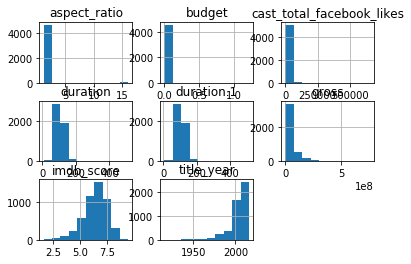

In [776]:
dataFrame_numeric.hist()

ALgo no cuadra con budget y gros, no lo comprendo. Ambos features hacen referencia al dinero

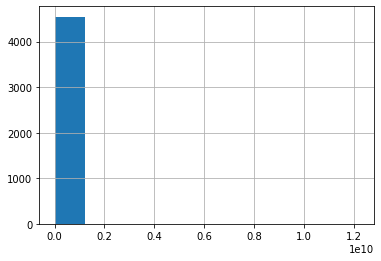

In [777]:
dataFrame_numeric['budget'].hist()

Para poder debuggear esta situación utilizaremos una tecnica muy tipica de pandas que se llama **boolean filtering**. Basicamente construimos una serie de booleanos con el mismo indice que nuestro dataframe (la serie clasicamente la llamaremos mask). 

In [778]:
# Este condicional nos indica que existen 6 peliculas que superan el billon
dataFrame_numeric[dataFrame_numeric['budget']>1e9]

,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
2323,1997.0,1.85,134.0,134.0,2710,2.400000e+09,8.4,2298191.0
2334,2004.0,1.85,103.0,103.0,991,2.127520e+09,6.9,410388.0
2988,2006.0,1.85,110.0,110.0,1173,1.221550e+10,7.0,2201412.0
3005,2005.0,2.35,134.0,134.0,11,2.500000e+09,7.1,195888.0
3423,1988.0,1.85,124.0,124.0,28,1.100000e+09,8.1,439162.0
3859,2005.0,2.35,112.0,112.0,907,4.200000e+09,7.7,211667.0


In [779]:
(dataFrame_numeric['budget']>1e9).value_counts()

False    5037
True        6
Name: budget, dtype: int64

In [780]:
mask = (dataFrame_numeric['budget']>1e9)
movies[mask]

,movie_title,title_year,color,aspect_ratio,duration,language,country,duration.1,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,budget,imdb_score,gross
2323,Princess Mononoke,1997.0,Color,1.85,134.0,Japanese,Japan,134.0,Adventure|Animation|Fantasy,PG-13,anime|cult film|forest|princess|studio ghibli,Hayao Miyazaki,Minnie Driver,Jada Pinkett Smith,Billy Crudup,2710,2.400000e+09,8.4,2298191.0
2334,Steamboy,2004.0,Color,1.85,103.0,Japanese,Japan,103.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,PG-13,19th century|ball|boy|inventor|steam,Katsuhiro Ôtomo,William Hootkins,Robin Atkin Downes,Rosalind Ayres,991,2.127520e+09,6.9,410388.0
2988,The Host,2006.0,Color,1.85,110.0,Korean,South Korea,110.0,Comedy|Drama|Horror|Sci-Fi,R,daughter|han river|monster|river|seoul,Joon-ho Bong,Doona Bae,Kang-ho Song,Ah-sung Ko,1173,1.221550e+10,7.0,2201412.0
3005,Fateless,2005.0,Color,2.35,134.0,Hungarian,Hungary,134.0,Drama|Romance|War,R,bus|death|gay slur|hatred|jewish,Lajos Koltai,Marcell Nagy,Péter Fancsikai,Bálint Péntek,11,2.500000e+09,7.1,195888.0
3423,Akira,1988.0,Color,1.85,124.0,Japanese,Japan,124.0,Action|Animation|Sci-Fi,R,based on manga|biker gang|gifted child|post th...,Katsuhiro Ôtomo,Mitsuo Iwata,Takeshi Kusao,Tesshô Genda,28,1.100000e+09,8.1,439162.0
3859,Lady Vengeance,2005.0,Color,2.35,112.0,Korean,South Korea,112.0,Crime|Drama,R,cake|christian|lesbian sex|oral sex|pregnant s...,Chan-wook Park,Min-sik Choi,Yeong-ae Lee,Hye-jeong Kang,907,4.200000e+09,7.7,211667.0


Tenemos un lio de limpieza de los datos. La BDD anterior fue creada sin diferenciar el tipo de modeda del presupuesto y el ingreso. La zona(pais/mundial) en la que el registro el ingreso

Para cuestiones del proyecto, usaremos una base de datos nueva que prevee el problema anterior ---> Importar BBDD thenumbers.com

In [781]:
data_good = pd.read_csv('./peliculasDataBuena.csv',encoding='utf-8')
data_good.head(n=3)         

,Unnamed: 0,movie_name,domestic_gross,movie_link,production_budget,release_date,worldwide_gross,movie_title
0,0,Avatar,760507625,http://www.the-numbers.com/movie/Avatar#tab=su...,425000000,12/18/2009,2783918982,Avatar
1,1,Star Wars Ep. VII: The Force Awakens,936662225,http://www.the-numbers.com/movie/Star-Wars-Ep-...,306000000,12/18/2015,2058662225,Star Wars: Episode VII - The Force Awakens ...
2,2,Pirates of the Caribbean: At World's End,309420425,http://www.the-numbers.com/movie/Pirates-of-th...,300000000,5/24/2007,963420425,Pirates of the Caribbean: At World's End


In [782]:
# Extraemos las columnas que nos interesa para realizar un merge con la base de datos anterior
financials_data = data_good[['movie_title','production_budget','worldwide_gross']]

In [783]:
display(financials_data.ndim,financials_data.shape,financials_data.size,len(financials_data))

2

(4341, 3)

13023

4341

Perdere aproximadamente 14%(702) datos. No es lo ideal, pero es preferible a tener datos sucios, si pierdo mas del 70% es una situación grave

In [784]:
display(1 - (data_good.shape[0]/dataFrame_numeric.shape[0]), dataFrame_numeric.shape[0]-data_good.shape[0])

0.13920285544318856

702

In [785]:
#Agregar la misma llave al datafram_numerico para hacer un join
dataFrame_numeric = pd.concat([dataFrame_numeric, movies['movie_title']],axis=1)
dataFrame_numeric.head(n=3)

,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross,movie_title
0,2009.0,1.78,178.0,178.0,4834,237000000.0,7.9,760505847.0,Avatar
1,2007.0,2.35,169.0,169.0,48350,300000000.0,7.1,309404152.0,Pirates of the Caribbean: At World's End
2,2015.0,2.35,148.0,148.0,11700,245000000.0,6.8,200074175.0,Spectre


In [786]:
#Hacemos el merge entre las bases de datos
dataFrame_numeric = pd.merge(financials_data,dataFrame_numeric,on = 'movie_title',how = 'left')

In [787]:
display(dataFrame_numeric.ndim,dataFrame_numeric.shape,dataFrame_numeric.head(n = 3))

2

(4385, 11)

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,Avatar,425000000,2783918982,2009.0,1.78,178.0,178.0,4834,237000000.0,7.9,760505847.0
1,Star Wars: Episode VII - The Force Awakens ...,306000000,2058662225,NaN,NaN,NaN,NaN,143,NaN,7.1,NaN
2,Pirates of the Caribbean: At World's End,300000000,963420425,2007.0,2.35,169.0,169.0,48350,300000000.0,7.1,309404152.0


In [788]:
# El profesor se le olvido explicar esto, pero hace merge con otra base de datos
#gross_opening = pd.read_csv('./opening_df.csv')
#Eliminaremos la columna  	Unnamed: 0
#gross_opening = gross_opening.drop('Unnamed: 0',axis=1)
#gross_opening.head()

In [789]:
#Le hacemos un merge a nuestro dataframe
#datafram_numerico2 = pd.merge(datafram_numerico2,gross_opening,on='movie_title',how='left')
#datafram_numerico2.tail()

Los datos faltantes generan problemas con muchos algoritmos de ML. Es por esto que existen distintas estrategias para lidiar con ellos

In [790]:
help(pd.Series.value_counts)

Help on function value_counts in module pandas.core.base:

value_counts(self, normalize=False, sort=True, ascending=False, bins=None, dropna=True)
    Return a Series containing counts of unique values.
    
    The resulting object will be in descending order so that the
    first element is the most frequently-occurring element.
    Excludes NA values by default.
    
    Parameters
    ----------
    normalize : boolean, default False
        If True then the object returned will contain the relative
        frequencies of the unique values.
    sort : boolean, default True
        Sort by values.
    ascending : boolean, default False
        Sort in ascending order.
    bins : integer, optional
        Rather than count values, group them into half-open bins,
        a convenience for ``pd.cut``, only works with numeric data.
    dropna : boolean, default True
        Don't include counts of NaN.
    
    Returns
    -------
    counts : Series
    
    See Also
    --------
    S

In [791]:
dataFrame_numeric.notnull().head()

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,False,False,False,False,True,False,True,False
2,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True


In [792]:
(dataFrame_numeric != 0).head()

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True


In [793]:
#Miramos en un nuevo dataframe booleano si hay valores no nulos y distintos a  0
available = ((dataFrame_numeric != 0) & (dataFrame_numeric.notnull()))
available.head()

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,False,False,False,False,True,False,True,False
2,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True


In [794]:
#Mira columna x columna (apply es como una iteración) la cantidad de valores que cumplen o no la condición 
dataFrame_numeric.notnull().apply(pd.Series.value_counts)

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
False,NaN,NaN,NaN,27,274,13,13,NaN,335,NaN,671
True,4385.0,4385.0,4385.0,4358,4111,4372,4372,4385.0,4050,4385.0,3714


In [795]:
(dataFrame_numeric!=0).apply(pd.Series.value_counts)

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
False,NaN,NaN,281,NaN,NaN,NaN,NaN,27,NaN,NaN,NaN
True,4385.0,4385.0,4104,4385.0,4385.0,4385.0,4385.0,4358,4385.0,4385.0,4385.0


In [796]:
#Cuenta por todas las columnas del dataframe booleano cuantos valores cumplen la condición anterior
available.all(axis=1).value_counts()

True     3408
False     977
dtype: int64

In [797]:
# Miramos si nuestra varible objetivo esta disponible worldwide_gross
mask = available['worldwide_gross']
dataFrame_numeric = dataFrame_numeric[mask]

In [798]:
#Nuestra variable objetivo esta limpia
((dataFrame_numeric != 0) & (dataFrame_numeric.notnull())).worldwide_gross.value_counts()

True    4104
Name: worldwide_gross, dtype: int64

In [799]:
#Miramos valores duplicados
dataFrame_numeric['movie_title'].duplicated(keep=False).value_counts()

False    4019
True       85
Name: movie_title, dtype: int64

In [800]:
dataFrame_numeric[dataFrame_numeric['movie_title'].duplicated(keep=False)].head()

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
8,Spider-Man 3,258000000,890875303,2007.0,2.35,156.0,156.0,46055,258000000.0,6.2,336530303.0
9,Spider-Man 3,258000000,890875303,2007.0,2.35,156.0,156.0,46055,258000000.0,6.2,336530303.0
34,Skyfall,200000000,1110526981,2012.0,2.35,143.0,143.0,2039,200000000.0,7.8,304360277.0
35,Skyfall,200000000,1110526981,2012.0,2.35,143.0,143.0,2039,200000000.0,7.8,304360277.0
37,Oz the Great and Powerful,200000000,490359051,2013.0,2.35,130.0,130.0,73441,215000000.0,6.4,234903076.0


In [801]:
# Eliminar los registros repetidos
dataFrame_numeric = dataFrame_numeric.drop_duplicates()
dataFrame_numeric['movie_title'].duplicated().value_counts()

False    4061
True       11
Name: movie_title, dtype: int64

In [802]:
indi = dataFrame_numeric[dataFrame_numeric['movie_title'].duplicated()].index
indi

Int64Index([43, 149, 297, 693, 778, 890, 896, 1362, 1862, 1948, 3389], dtype='int64')

In [803]:
dataFrame_numeric = dataFrame_numeric.drop(indi)
dataFrame_numeric.duplicated().value_counts()

False    4061
dtype: int64

In [804]:
# Eliminaremos la columna movie_title, ya que no nos sirve para el estudio
dataFrame_numeric = dataFrame_numeric.drop('movie_title',axis=1)

In [805]:
# Eliminamos la columna duplicada
# inplace es para borrar la columna en la misma base de datos
dataFrame_numeric = dataFrame_numeric.drop('duration.1',axis=1)

In [806]:
dataFrame_numeric.head()

,production_budget,worldwide_gross,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,gross
0,425000000,2783918982,2009.0,1.78,178.0,4834,237000000.0,7.9,760505847.0
1,306000000,2058662225,NaN,NaN,NaN,143,NaN,7.1,NaN
2,300000000,963420425,2007.0,2.35,169.0,48350,300000000.0,7.1,309404152.0
3,300000000,879620923,2015.0,2.35,148.0,11700,245000000.0,6.8,200074175.0
4,275000000,1084439099,2012.0,2.35,164.0,106759,250000000.0,8.5,448130642.0


In [807]:
#sklearn nos ofrece un modulo preprocessing que nos ayudara a gestionar los datos faltantes
#Consideramos como faltantes los datos que aparecen en el dataframe como nan
#La estrategia es remplazar los valores con el promedio de la columna. Existen mas estrategias en la doc de sklearn
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [808]:
# Se aplico la estrategia de modificar en los campos NAN el promedio de cada columna
values = imputer.fit_transform(dataFrame_numeric)

In [809]:
dataFrame_numeric.values

array([[4.25000000e+08, 2.78391898e+09, 2.00900000e+03, ...,
        2.37000000e+08, 7.90000000e+00, 7.60505847e+08],
       [3.06000000e+08, 2.05866222e+09,            nan, ...,
                   nan, 7.10000000e+00,            nan],
       [3.00000000e+08, 9.63420425e+08, 2.00700000e+03, ...,
        3.00000000e+08, 7.10000000e+00, 3.09404152e+08],
       ...,
       [7.00000000e+03, 9.00000000e+02, 2.00500000e+03, ...,
        3.25000000e+03, 7.80000000e+00,            nan],
       [3.96700000e+03, 1.04430000e+04, 2.01200000e+03, ...,
                   nan, 6.30000000e+00, 1.04430000e+04],
       [1.10000000e+03, 1.81041000e+05, 2.00400000e+03, ...,
        1.10000000e+03, 6.60000000e+00, 8.52220000e+04]])

In [810]:
values

array([[4.25000000e+08, 2.78391898e+09, 2.00900000e+03, ...,
        2.37000000e+08, 7.90000000e+00, 7.60505847e+08],
       [3.06000000e+08, 2.05866222e+09, 2.00210263e+03, ...,
        3.71233913e+07, 7.10000000e+00, 4.81900113e+07],
       [3.00000000e+08, 9.63420425e+08, 2.00700000e+03, ...,
        3.00000000e+08, 7.10000000e+00, 3.09404152e+08],
       ...,
       [7.00000000e+03, 9.00000000e+02, 2.00500000e+03, ...,
        3.25000000e+03, 7.80000000e+00, 4.81900113e+07],
       [3.96700000e+03, 1.04430000e+04, 2.01200000e+03, ...,
        3.71233913e+07, 6.30000000e+00, 1.04430000e+04],
       [1.10000000e+03, 1.81041000e+05, 2.00400000e+03, ...,
        1.10000000e+03, 6.60000000e+00, 8.52220000e+04]])

In [811]:
x = pd.DataFrame(values)
x.columns = dataFrame_numeric.columns
x.index = dataFrame_numeric.index
x

,production_budget,worldwide_gross,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,gross
0,425000000.0,2.783919e+09,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9,7.605058e+08
1,306000000.0,2.058662e+09,2002.102628,2.126683,108.552703,143.0,3.712339e+07,7.1,4.819001e+07
2,300000000.0,9.634204e+08,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1,3.094042e+08
3,300000000.0,8.796209e+08,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8,2.000742e+08
4,275000000.0,1.084439e+09,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5,4.481306e+08
5,275000000.0,2.600021e+08,2013.000000,2.350000,150.000000,45757.0,2.150000e+08,6.5,8.928991e+07
6,275000000.0,2.827781e+08,2012.000000,2.350000,132.000000,1873.0,2.637000e+08,6.6,7.305868e+07
7,260000000.0,5.865819e+08,2010.000000,1.850000,100.000000,2036.0,2.600000e+08,7.8,2.008073e+08
8,258000000.0,8.908753e+08,2007.000000,2.350000,156.000000,46055.0,2.580000e+08,6.2,3.365303e+08
10,250000000.0,1.404706e+09,2015.000000,2.350000,141.000000,92000.0,2.500000e+08,7.5,4.589916e+08


In [812]:
dataFrame_numeric.describe()

,production_budget,worldwide_gross,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,gross
count,4.061000e+03,4.061000e+03,4034.000000,3901.000000,4051.000000,4061.000000,3.764000e+03,4061.000000,3.669000e+03
mean,3.322837e+07,9.545619e+07,2002.102628,2.126683,108.552703,10307.988919,3.712339e+07,6.456513,4.819001e+07
std,4.088155e+07,1.730473e+08,12.077191,0.759690,23.119867,18821.488171,7.221793e+07,1.071517,6.731861e+07
min,1.100000e+03,4.500000e+02,1920.000000,1.180000,7.000000,0.000000,2.180000e+02,1.600000,1.620000e+02
25%,7.000000e+06,7.445044e+06,1999.000000,1.850000,94.000000,1591.000000,8.000000e+06,5.800000,5.654777e+06
50%,2.000000e+07,3.346201e+07,2005.000000,2.350000,104.000000,3341.000000,2.000000e+07,6.600000,2.561579e+07
75%,4.300000e+07,1.045054e+08,2010.000000,2.350000,119.000000,14619.000000,4.500000e+07,7.200000,6.245332e+07
max,4.250000e+08,2.783919e+09,2016.000000,16.000000,325.000000,656730.000000,2.500000e+09,9.500000,7.605058e+08


In [813]:
# Guardamos el data limpio
x.to_csv('dataEntreno.csv',index=False)